#Unidad 1 PRUEBA DE MANN-WITHNEY

Se realizo una encuesta en Naucalpan de Juarez con una poblacion de 834,434 habitantes, en la que las candidatas, Claudia Sheinbaum y Xóchitl Gálvez, compiten por la presidencia de la republica. Según los datos, la tasa de participación en las elecciones es del 60%.
Se desea determinar si hay una diferencia significativa en el número de votos obtenidos por cada candidato. Los porcentajes de votos esperados para cada candidata son los siguientes:

*   Claudia Sheinbaum: 58% de los votos
*   Xóchitl Gálvez: 33% de los votos

Para resolver este problema, se realizará una prueba estadística no paramétrica, específicamente la prueba de Mann-Whitney, para comparar los votos entre ambos candidatos.

Primero usaremos la libreria scipy stats la cual ya incluye mann whitney entre sus funciones.

In [ ]:
import numpy as np
from scipy.stats import mannwhitneyu

# Población total y participación
poblacion_total = 834434
participacion = 0.60

# Votos por cada candidato
votos_claudia = poblacion_total * participacion * 0.58
votos_xochitl = poblacion_total * participacion * 0.33

# Mostrar los votos calculados
print("Votos para Claudia Sheinbaum:", votos_claudia)
print("Votos para Xóchitl Gálvez:", votos_xochitl)

# Realizar la prueba de Mann-Whitney
statistic, p_value = mannwhitneyu(np.random.normal(votos_claudia, 1000, 1000), np.random.normal(votos_xochitl, 1000, 1000))

# Mostrar los resultados de la prueba
print("\nResultados de la prueba de Mann-Whitney:")
print("Estadístico de prueba:", statistic)
print("Valor p:", p_value)

# Realizar conclusiones
alpha = 0.05
if p_value < alpha:
    print("\nConclusión: Hay evidencia suficiente para rechazar la hipótesis nula.")
    print("Los votos obtenidos por Claudia Sheinbaum y Xóchitl Gálvez son significativamente diferentes.")
else:
    print("\nConclusión: No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No se pueden hacer conclusiones significativas sobre la diferencia en los votos entre Claudia Sheinbaum y Xóchitl Gálvez.")


Votos para Claudia Sheinbaum: 290383.03199999995
Votos para Xóchitl Gálvez: 165217.932

Resultados de la prueba de Mann-Whitney:
Estadístico de prueba: 1000000.0
Valor p: 0.0

Conclusión: Hay evidencia suficiente para rechazar la hipótesis nula.
Los votos obtenidos por Claudia Sheinbaum y Xóchitl Gálvez son significativamente diferentes.


Asimismo realizaremos el codigo sin usar scipy

In [ ]:
import numpy as np

# Función para calcular el estadístico U de Mann-Whitney
def mannwhitneyu_manual(x, y):
    n1 = len(x)
    n2 = len(y)
    ranked = np.argsort(np.concatenate((x, y)))
    ranks = np.empty_like(ranked)
    ranks[ranked] = np.arange(1, n1 + n2 + 1)
    ranks_x = ranks[:n1]
    ranks_y = ranks[n1:]

    U1 = np.sum(ranks_x) - (n1 * (n1 + 1)) / 2
    U2 = np.sum(ranks_y) - (n2 * (n2 + 1)) / 2
    U = min(U1, U2)

    # Calcular la media y desviación estándar de U
    mu_U = n1 * n2 / 2
    sigma_U = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)

    # Calcular el valor Z
    Z = (U - mu_U) / sigma_U

    # Calcular el valor p para una cola
    from scipy.stats import norm
    p_value = norm.cdf(Z)

    return U, p_value

# Población total y participación
poblacion_total = 834434
participacion = 0.60

# Votos por cada candidato
votos_claudia = poblacion_total * participacion * 0.58
votos_xochitl = poblacion_total * participacion * 0.33

# Mostrar los votos calculados
print("Votos para Claudia Sheinbaum:", votos_claudia)
print("Votos para Xóchitl Gálvez:", votos_xochitl)

# Generar las muestras
muestra_claudia = np.random.normal(votos_claudia, 1000, 1000)
muestra_xochitl = np.random.normal(votos_xochitl, 1000, 1000)

# Realizar la prueba de Mann-Whitney manualmente
statistic, p_value = mannwhitneyu_manual(muestra_claudia, muestra_xochitl)

# Mostrar los resultados de la prueba
print("\nResultados de la prueba de Mann-Whitney:")
print("Estadístico de prueba:", statistic)
print("Valor p:", p_value)

# Realizar conclusiones
alpha = 0.05
if p_value < alpha:
    print("\nConclusión: Hay evidencia suficiente para rechazar la hipótesis nula.")
    print("Los votos obtenidos por Claudia Sheinbaum y Xóchitl Gálvez son significativamente diferentes.")
else:
    print("\nConclusión: No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No se pueden hacer conclusiones significativas sobre la diferencia en los votos entre Claudia Sheinbaum y Xóchitl Gálvez.")


Votos para Claudia Sheinbaum: 290383.03199999995
Votos para Xóchitl Gálvez: 165217.932

Resultados de la prueba de Mann-Whitney:
Estadístico de prueba: 0.0
Valor p: 0.0

Conclusión: Hay evidencia suficiente para rechazar la hipótesis nula.
Los votos obtenidos por Claudia Sheinbaum y Xóchitl Gálvez son significativamente diferentes.


#Unidad 2 TEOREMA DE BAYES PARA UNA DISTRIBUCIÓN POISSON

En un período de oleada de calor, Ciel está analizando el comportamiento de ventas en diferentes ciudades. La cantidad de ventas de botellas de agua por día sigue una distribución Poisson con diferentes tasas en cada ciudad. Se han determinado los siguientes posibles valores para las tasas de ventas diarias (en miles de botellas):

*   5, 6, 7, 8, 9, 10, 5, 6, 7, 8, 9, 10.


Basado en datos históricos, las probabilidades a priori para estas tasas son:

*  0.1, 0.2, 0.3, 0.2, 0.1, 0.1

Utilizar el teorema de Bayes para actualizar la probabilidad a priori de las tasas de ventas después de observar los siguientes datos preliminares:

En la primera ciudad, se observan 8 mil botellas vendidas en un día.

En la segunda ciudad, se observan 4 mil botellas vendidas en un día.


In [ ]:
import numpy as np
from scipy.stats import poisson

# Tasas de ventas posibles (en miles de botellas por día)
lambdas_ventas = np.array([5, 6, 7, 8, 9, 10])

# Probabilidades a priori para cada tasa
priors_ventas = np.array([0.1, 0.2, 0.3, 0.2, 0.1, 0.1])

# Datos observados para las dos ciudades (en miles de botellas vendidas por día)
observaciones_ventas = [8, 4]

def bayes_update(lambdas, priors, observacion):
    # Calcular la verosimilitud P(Y=y | λ)
    likelihoods = poisson.pmf(observacion, lambdas)

    # Calcular la probabilidad posterior P(λ | Y=y)
    posteriors = likelihoods * priors
    posteriors /= np.sum(posteriors)  # Normalizar

    return posteriors

# Calcular la distribución posterior para las observaciones
posterior_Y8 = bayes_update(lambdas_ventas, priors_ventas, observaciones_ventas[0])
posterior_Y4 = bayes_update(lambdas_ventas, priors_ventas, observaciones_ventas[1])

print("Distribución posterior para Y=8 (primera ciudad):")
for lam, post in zip(lambdas_ventas, posterior_Y8):
    print(f"λ={lam}: {post:.4f}")

print("\nDistribución posterior para Y=4 (segunda ciudad):")
for lam, post in zip(lambdas_ventas, posterior_Y4):
    print(f"λ={lam}: {post:.4f}")


Distribución posterior para Y=8 (primera ciudad):
λ=5: 0.0550
λ=6: 0.1741
λ=7: 0.3297
λ=8: 0.2353
λ=9: 0.1110
λ=10: 0.0949

Distribución posterior para Y=4 (segunda ciudad):
λ=5: 0.1985
λ=6: 0.3028
λ=7: 0.3096
λ=8: 0.1295
λ=9: 0.0382
λ=10: 0.0214


#Unidad 3 TEOREMA DE BAYES PARA LA MEDIA NORMAL CON PRIOR DISCRETA

Durante una ola de calor en México, un investigador desea determinar el consumo promedio diario de agua en litros por hogar en una ciudad. Se asume que el consumo diario sigue una distribución normal con una desviación estándar conocida igual a 25 litros. Se recolectan 12 muestras de consumo de agua, resultando en los siguientes valores en litros por hogar por día: 180, 220, 210, 230, 190, 200, 215, 225, 210, 195, 205, 200. El investigador decide usar una distribución a priori discreta uniforme para los valores posibles del consumo promedio: 160, 170, 180, 190, 200, 210, 220, y 230 litros por hogar por día. Se pide encontrar la distribución posterior para estos valores.

In [ ]:
import numpy as np
from scipy.stats import norm

# Parámetros conocidos
sigma = 25
muestras = np.array([180, 220, 210, 230, 190, 200, 215, 225, 210, 195, 205, 200])
n = len(muestras)
mu_values = np.array([160, 170, 180, 190, 200, 210, 220, 230])
priors = np.ones(len(mu_values)) / len(mu_values)  # Prior uniforme

# Calcular la verosimilitud para cada valor de mu
def likelihood(mu, muestras, sigma):
    return np.prod(norm.pdf(muestras, loc=mu, scale=sigma))

likelihoods = np.array([likelihood(mu, muestras, sigma) for mu in mu_values])

# Calcular la posteriori
posteriors = likelihoods * priors
posteriors /= np.sum(posteriors)  # Normalizar

print("Distribución posterior para cada valor de mu:")
for mu, post in zip(mu_values, posteriors):
    print(f"mu={mu}: {post:.4f}")


Distribución posterior para cada valor de mu:
mu=160: 0.0000
mu=170: 0.0000
mu=180: 0.0006
mu=190: 0.0384
mu=200: 0.3608
mu=210: 0.4969
mu=220: 0.1003
mu=230: 0.0030


#Unidad 4 COMPARACIÓN DE ENFOQUE FRECUENTISTA Y ENFOQUE BAYESIANO

Durante una ola de calor en México, un equipo de meteorólogos desea determinar la temperatura promedio diaria en grados Celsius en una ciudad. Se recolectan 15 muestras de temperatura, resultando en los siguientes valores: 32, 35, 33, 36, 34, 37, 36, 38, 35, 33, 34, 35, 36, 37, 36. Se sabe que la temperatura sigue una distribución normal con una desviación estándar conocida de 2 grados Celsius. El equipo de meteorólogos establece una priori normal con una media de 35 grados Celsius y una desviación estándar de 1 grado Celsius. Se pide:

A) Obtener la distribución posterior para la temperatura promedio diaria.

B) Calcular un intervalo de confianza del 95% para la media posterior.

C) Realizar una prueba de hipótesis donde μ≥36 (la temperatura promedio es mayor o igual a 36 grados Celsius).

In [ ]:
import numpy as np
from scipy.stats import norm

# Datos de las muestras
muestras = np.array([32, 35, 33, 36, 34, 37, 36, 38, 35, 33, 34, 35, 36, 37, 36])
n = len(muestras)

# Parámetros conocidos
sigma = 2  # Desviación estándar conocida
mu_prior = 35  # Media de la priori normal
sigma_prior = 1  # Desviación estándar de la priori normal

# A) Calcular la distribución posterior
mu_posterior = (mu_prior / sigma_prior**2 + np.sum(muestras) / sigma**2) / (1 / sigma_prior**2 + n / sigma**2)
sigma_posterior = np.sqrt(1 / (1 / sigma_prior**2 + n / sigma**2))

print("A) Distribución posterior:")
print("Media posterior:", mu_posterior)
print("Desviación estándar posterior:", sigma_posterior)

# B) Calcular un intervalo de confianza del 95% para la media posterior
z = norm.ppf(0.975)  # Estadístico z para el nivel de confianza del 95%
intervalo = (mu_posterior - z * sigma_posterior, mu_posterior + z * sigma_posterior)

print("\nB) Intervalo de confianza del 95% para la media posterior:")
print("Intervalo:", intervalo)

# C) Realizar una prueba de hipótesis donde µ ≥ 36
z_hipotesis = (mu_posterior - 36) / sigma_posterior  # Estadístico z para la hipótesis
p_value = 1 - norm.cdf(z_hipotesis)  # Calcular el valor p

print("\nC) Prueba de hipótesis donde µ ≥ 36:")
print("Estadístico z:", z_hipotesis)
print("Valor p:", p_value)


A) Distribución posterior:
Media posterior: 35.10526315789474
Desviación estándar posterior: 0.45883146774112354

B) Intervalo de confianza del 95% para la media posterior:
Intervalo: (34.20597000614848, 36.004556309640996)

C) Prueba de hipótesis donde µ ≥ 36:
Estadístico z: -1.9500337378997685
Valor p: 0.974413951012445


#Unidad 5 ANÁLISIS DE VARIANZA EN EL DISEÑO DE EXPERIMENTOS

Un equipo de investigadores está llevando a cabo un estudio sobre el efecto de diferentes métodos de enfriamiento en el alivio de la temperatura durante una ola de calor en México. Deciden utilizar un diseño completamente aleatorizado para asignar aleatoriamente los métodos de enfriamiento a diferentes grupos de personas.

El estudio se realiza en una ciudad afectada por la ola de calor. Se seleccionan tres métodos de enfriamiento diferentes: Aire acondicionado, Ventilador y Rociadores de agua. El equipo de investigadores decide asignar aleatoriamente a los residentes de la ciudad a cada uno de los tres grupos de tratamiento. Después de un período de tiempo, se registra la temperatura corporal de cada participante.

Los datos recolectados son los siguientes:

Grupo de tratamiento A (Aire acondicionado):
Temperaturas corporales (en °C): 36.5, 36.3, 36.2, 36.4, 36.6, 36.1, 36.3, 36.2, 36.4, 36.5.

Grupo de tratamiento B (Ventilador):
Temperaturas corporales (en °C): 36.8, 36.9, 36.7, 36.6, 36.5, 36.7, 36.9, 36.8, 36.6, 36.5.

Grupo de tratamiento C (Rociadores de agua):
Temperaturas corporales (en °C): 36.4, 36.2, 36.1, 36.3, 36.5, 36.0, 36.2, 36.4, 36.3, 36.1.

El equipo de investigadores desea analizar si existe alguna diferencia significativa en la temperatura corporal entre los tres grupos de tratamiento.

In [ ]:
import numpy as np

# Datos de temperaturas corporales por grupo de tratamiento
tratamiento_A = np.array([36.5, 36.3, 36.2, 36.4, 36.6, 36.1, 36.3, 36.2, 36.4, 36.5])
tratamiento_B = np.array([36.8, 36.9, 36.7, 36.6, 36.5, 36.7, 36.9, 36.8, 36.6, 36.5])
tratamiento_C = np.array([36.4, 36.2, 36.1, 36.3, 36.5, 36.0, 36.2, 36.4, 36.3, 36.1])

# Calcular la media de cada grupo
media_A = np.mean(tratamiento_A)
media_B = np.mean(tratamiento_B)
media_C = np.mean(tratamiento_C)

# Calcular la media general
media_general = np.mean(np.concatenate([tratamiento_A, tratamiento_B, tratamiento_C]))

# Calcular la suma de los cuadrados entre grupos (SSB)
SSB = len(tratamiento_A) * (media_A - media_general)**2 + \
      len(tratamiento_B) * (media_B - media_general)**2 + \
      len(tratamiento_C) * (media_C - media_general)**2

# Calcular la suma de los cuadrados dentro de grupos (SSW)
SSW = np.sum((tratamiento_A - media_A)**2) + \
      np.sum((tratamiento_B - media_B)**2) + \
      np.sum((tratamiento_C - media_C)**2)

# Calcular el estadístico F
grados_libertad_entre = 3 - 1
grados_libertad_dentro = len(tratamiento_A) + len(tratamiento_B) + len(tratamiento_C) - 3
estadistico_F = (SSB / grados_libertad_entre) / (SSW / grados_libertad_dentro)

# Calcular el valor p utilizando la distribución F
from scipy.stats import f

valor_p = 1 - f.cdf(estadistico_F, grados_libertad_entre, grados_libertad_dentro)

print("Resultado del ANOVA:")
print("Estadístico F:", estadistico_F)
print("Valor p:", valor_p)


Resultado del ANOVA:
Estadístico F: 23.19230769230792
Valor p: 1.3732291500589966e-06


In [ ]:
import numpy as np

# Datos de temperaturas corporales por grupo de tratamiento
tratamiento_A = np.array([36.5, 36.3, 36.2, 36.4, 36.6, 36.1, 36.3, 36.2, 36.4, 36.5])
tratamiento_B = np.array([36.8, 36.9, 36.7, 36.6, 36.5, 36.7, 36.9, 36.8, 36.6, 36.5])
tratamiento_C = np.array([36.4, 36.2, 36.1, 36.3, 36.5, 36.0, 36.2, 36.4, 36.3, 36.1])

# Concatenar todas las muestras
todas_las_muestras = np.concatenate([tratamiento_A, tratamiento_B, tratamiento_C])

# Crear etiquetas de grupo
etiquetas_grupo = np.repeat(['A', 'B', 'C'], [len(tratamiento_A), len(tratamiento_B), len(tratamiento_C)])

# Calcular las medias de cada grupo
medias_grupo = np.array([np.mean(tratamiento_A), np.mean(tratamiento_B), np.mean(tratamiento_C)])

# Calcular la media general
media_general = np.mean(todas_las_muestras)

# Calcular las diferencias entre las medias de cada grupo y la media general
diferencias = medias_grupo - media_general

# Calcular el error estándar de las diferencias
error_estandar_diferencias = np.sqrt((2 / len(tratamiento_A) + 2 / len(tratamiento_B) + 2 / len(tratamiento_C)) * np.var(todas_las_muestras))

# Calcular los intervalos de confianza ajustados (método Tukey)
from statsmodels.stats.libqsturng import psturng

# Nivel de confianza del 95%
nivel_confianza = 0.95

# Calcular los intervalos de confianza
intervalos_confianza = np.column_stack((diferencias - error_estandar_diferencias * psturng(np.abs(diferencias) / error_estandar_diferencias, 3, len(todas_las_muestras) - 3),
                                        diferencias + error_estandar_diferencias * psturng(np.abs(diferencias) / error_estandar_diferencias, 3, len(todas_las_muestras) - 3)))

print("\nResultados de la prueba de Tukey:")
print("Intervalos de confianza ajustados:")
for i, grupo in enumerate(['A', 'B', 'C']):
    print(f"Grupo {grupo}: {intervalos_confianza[i]}")



Resultados de la prueba de Tukey:
Intervalos de confianza ajustados:
Grupo A: [-0.2525078   0.08584113]
Grupo B: [0.15808511 0.37524823]
Grupo C: [-0.32554295 -0.04112371]


Asimismo se realizo un codigo el cual aprovecha las librerias de python

In [ ]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import numpy as np

# Datos de temperaturas corporales por grupo de tratamiento
tratamiento_A = np.array([36.5, 36.3, 36.2, 36.4, 36.6, 36.1, 36.3, 36.2, 36.4, 36.5])
tratamiento_B = np.array([36.8, 36.9, 36.7, 36.6, 36.5, 36.7, 36.9, 36.8, 36.6, 36.5])
tratamiento_C = np.array([36.4, 36.2, 36.1, 36.3, 36.5, 36.0, 36.2, 36.4, 36.3, 36.1])

# Realizar ANOVA
f_statistic, p_value = f_oneway(tratamiento_A, tratamiento_B, tratamiento_C)

print("Resultado del ANOVA:")
print("Estadístico F:", f_statistic)
print("Valor p:", p_value)

# Realizar pruebas de comparaciones múltiples (Tukey)
temperaturas = np.concatenate([tratamiento_A, tratamiento_B, tratamiento_C])
grupos = ['A'] * len(tratamiento_A) + ['B'] * len(tratamiento_B) + ['C'] * len(tratamiento_C)

tukey_resultados = pairwise_tukeyhsd(temperaturas, grupos)

print("\nResultados de la prueba de Tukey:")
print(tukey_resultados)


Resultado del ANOVA:
Estadístico F: 23.19230769230794
Valor p: 1.373229150049857e-06

Resultados de la prueba de Tukey:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     A      B     0.35 0.0001  0.178  0.522   True
     A      C     -0.1 0.3347 -0.272  0.072  False
     B      C    -0.45    0.0 -0.622 -0.278   True
--------------------------------------------------


##Unidad 6 ANALISIS DE REGRESION LINEAL

Durante una ola de calor en México, se ha observado que la temperatura máxima diaria está influenciada por varios factores como la humedad, la velocidad del viento, la presión atmosférica y la radiación solar. El objetivo es construir un modelo de regresión lineal múltiple para predecir la temperatura máxima diaria en función de estos factores.

Variables del Problema
Temperatura Máxima (Y): Variable dependiente, en grados Celsius.
Humedad (X1): Variable independiente, en porcentaje.
Velocidad del Viento (X2): Variable independiente, en km/h.
Presión Atmosférica (X3): Variable independiente, en hPa.
Radiación Solar (X4): Variable independiente, en W/m².

Error cuadrático medio: 68.78450071059873
Coeficiente de determinación (R^2): 0.9435261135577693
Intercepto: -76.94411129160852
Coeficientes: [ 0.42798589  0.38075913 -0.14841974  0.72094705]


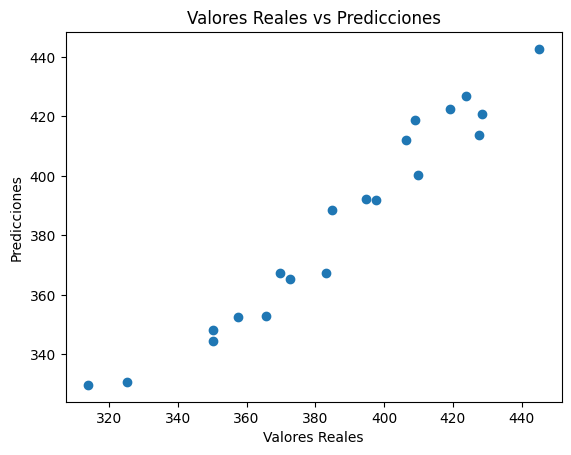

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Generar datos aleatorios
np.random.seed(0)
num_samples = 100

# Variables independientes
humedad = np.random.randint(40, 80, num_samples)
velocidad_viento = np.random.randint(5, 25, num_samples)
presion = np.random.randint(1000, 1025, num_samples)
radiacion_solar = np.random.randint(700, 900, num_samples)

# Variable dependiente (creamos una relación ficticia con un poco de ruido)
temperatura_max = 0.3 * humedad + 0.5 * velocidad_viento - 0.2 * presion + 0.7 * radiacion_solar + np.random.normal(0, 10, num_samples)

# Crear un DataFrame
data = pd.DataFrame({
    'humedad': humedad,
    'velocidad_viento': velocidad_viento,
    'presion': presion,
    'radiacion_solar': radiacion_solar,
    'temperatura_max': temperatura_max
})

# Separar las variables independientes (X) y la variable dependiente (Y)
X = data[['humedad', 'velocidad_viento', 'presion', 'radiacion_solar']]
Y = data['temperatura_max']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, Y_train)

# Hacer predicciones con el conjunto de prueba
Y_pred = model.predict(X_test)

# Calcular el error cuadrático medio
mse = mean_squared_error(Y_test, Y_pred)

# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(Y_test, Y_pred)

print('Error cuadrático medio:', mse)
print('Coeficiente de determinación (R^2):', r2)

# Imprimir los coeficientes del modelo
print('Intercepto:', model.intercept_)
print('Coeficientes:', model.coef_)

# Visualización de los resultados
plt.scatter(Y_test, Y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones')
plt.show()
